# Importing required libraries 
Numpy For Numerical Scientific Computing |
Pandas For Data Manipulations |
Tweepy For data Fetch From Twitter API |
VaderSentiment For Finding The Polarity Scores of words |
nltk For wordnet and pre proprocessing the text |


In [4]:
!pip install tweepy==3.7.0

In [7]:
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import re
from matplotlib import pyplot as plt
import json
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

# To scrape the data from twitter API as per the hashtag and date

In [34]:
def scrape(words, date_since, numtweet): 
    print(1)
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text',  'hashtags']) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en",since=date_since, tweet_mode='extended').items(numtweet) 

    print(tweets)
    
    list_tweets = [tweet for tweet in tweets] 
 
    i = 1  
      
    for tweet in list_tweets:
    
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
        
        try: 
            text = tweet.retweeted_status.full_text
        
        except AttributeError: 
            text = tweet.full_text
            
        hashtext = list() 
        for j in range(0, len(hashtags)):
            
            hashtext.append(hashtags[j]['text']) 
    
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 

        # Function call to print tweet data on screen 
        #print(tweetdata(i, ith_tweet))
        
        i = i+1
    
    filename = 'scraped_tweets2.csv'
    
    db

    db.to_csv(filename) 
    print("Done----------")

if __name__ == '__main__': 
    #Storing Twitter Keys in variables
    
    consumer_key = 'k9YKWOaTpXgJ71fTxBVl3ykGy'
    consumer_secret = 'ug8mVWxic0PI8bpOstXeqg3K3ksU6x50ZT170JMxK1ENIvCaVt'
    access_key = '1345953528519380994-McJzQG1oNzrohRbSsKlLXfVNvaiMs1'
    access_secret = 'GsrtlxLsi96pwei17Z6OUn3hLmoIQE16yB13vteQrSahm'
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet = 1000
    scrape(words, date_since, numtweet) 
    print('Scraping has completed!')

Enter Twitter HashTag to search for
tiktok
Enter Date since The Tweets are required in yyyy-mm--dd
2019-08-01
1


C:\Users\Asus\Anaconda3\envs\Environment1\lib\site-packages\pandas\core\dtypes\cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


Done----------
Scraping has completed!


# Loading the contractions.json for conversion like are 
  "ain't": "am not" |
  "aren't": "are not"

In [35]:
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict

# Reading the scraped tweets which extracted from the API

In [36]:
import pandas as pd
data= pd.read_csv("scraped_tweets2.csv")
data.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,ssskh___,super smooth,NaN,55,84,11794,10,cleaning-tiktok has me in a chokehold,[]
1,1,Yby86940097,NaN,NaN,307,42,4444,227,"If the sound has a blue TikTok sign beside it,...",[]
2,2,EXOtiktokteam,"WE ARE ONE, EXO (엑소). Antis/Solo stan = 🚫 | 📩e...",Exoplanet,16,1624,4168,0,User @/ferrior614 uploaded another dance cover...,"['PEACHES', 'KAI', 'EXO']"
3,3,nishimiy4,NaN,NaN,812,569,34152,5,continue their classes despite the situation t...,[]
4,4,WitchDoctor_96,NaN,NaN,601,1278,48222,2,This scene always made me laugh 😂 TikTok edit ...,[]


# Finding sentiments from the emojis for sarcastic comments

In [37]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

# Pre-processing the tweets using regular expression 

In [38]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [39]:
data['processed_tweet'] = np.vectorize(process_tweet)(data['text'])
data.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,processed_tweet
0,0,ssskh___,super smooth,NaN,55,84,11794,10,cleaning-tiktok has me in a chokehold,[],cleaning tiktok has me in chokehold
1,1,Yby86940097,NaN,NaN,307,42,4444,227,"If the sound has a blue TikTok sign beside it,...",[],if the sound has blue tiktok sign beside it th...
2,2,EXOtiktokteam,"WE ARE ONE, EXO (엑소). Antis/Solo stan = 🚫 | 📩e...",Exoplanet,16,1624,4168,0,User @/ferrior614 uploaded another dance cover...,"['PEACHES', 'KAI', 'EXO']",user uploaded another dance cover of peaches b...
3,3,nishimiy4,NaN,NaN,812,569,34152,5,continue their classes despite the situation t...,[],continue their classes despite the situation t...
4,4,WitchDoctor_96,NaN,NaN,601,1278,48222,2,This scene always made me laugh 😂 TikTok edit ...,[],this scene always made me laugh tiktok edit by...


# Sample data after pre-processing the tweets

In [40]:
tokenized_tweet = data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0           [cleaning, tiktok, has, me, in, chokehold]
1    [if, the, sound, has, blue, tiktok, sign, besi...
2    [user, uploaded, another, dance, cover, of, pe...
3    [continue, their, classes, despite, the, situa...
4    [this, scene, always, made, me, laugh, tiktok,...
Name: processed_tweet, dtype: object

# Using lemmatizer for converting words to  root words like changing:change | playing:play

In [41]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0            [cleaning, tiktok, ha, me, in, chokehold]
1    [if, the, sound, ha, blue, tiktok, sign, besid...
2    [user, uploaded, another, dance, cover, of, pe...
3    [continue, their, class, despite, the, situati...
4    [this, scene, always, made, me, laugh, tiktok,...
Name: processed_tweet, dtype: object

# Removing stopwords

In [42]:
stopwords = nltk.corpus.stopwords.words('english')
for i in range(len(tokenized_tweet)):

     tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) 
     
data['processed_tweet'] = tokenized_tweet
data.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,processed_tweet
0,0,ssskh___,super smooth,NaN,55,84,11794,10,cleaning-tiktok has me in a chokehold,[],cleaning tiktok ha me in chokehold
1,1,Yby86940097,NaN,NaN,307,42,4444,227,"If the sound has a blue TikTok sign beside it,...",[],if the sound ha blue tiktok sign beside it tha...
2,2,EXOtiktokteam,"WE ARE ONE, EXO (엑소). Antis/Solo stan = 🚫 | 📩e...",Exoplanet,16,1624,4168,0,User @/ferrior614 uploaded another dance cover...,"['PEACHES', 'KAI', 'EXO']",user uploaded another dance cover of peach by ...
3,3,nishimiy4,NaN,NaN,812,569,34152,5,continue their classes despite the situation t...,[],continue their class despite the situation tha...
4,4,WitchDoctor_96,NaN,NaN,601,1278,48222,2,This scene always made me laugh 😂 TikTok edit ...,[],this scene always made me laugh tiktok edit by...


# To find the polarity scores for each tweet

In [43]:
analyzer = SentimentIntensityAnalyzer()

data['neg'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
data['neu'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
data['pos'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
data['compound'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
data[['processed_tweet','neg','pos','compound']].head()

,processed_tweet,neg,pos,compound
0,cleaning tiktok ha me in chokehold,0.000,0.324,0.3400
1,if the sound ha blue tiktok sign beside it tha...,0.000,0.199,0.8271
2,user uploaded another dance cover of peach by ...,0.000,0.176,0.5994
3,continue their class despite the situation tha...,0.107,0.000,-0.5509
4,this scene always made me laugh tiktok edit by...,0.000,0.286,0.5574


# Label the tweet as per the compound score

In [44]:
def getAnalysis(score):
    if score < 0:
      return 'negative'
    elif score == 0:
      return 'neutral'
    else:
      return 'positive'

data['sentiment'] = data['compound'].apply(getAnalysis)
# Show the dataframe
data[['processed_tweet','neg','pos','compound','sentiment']].head()

,processed_tweet,neg,pos,compound,sentiment
0,cleaning tiktok ha me in chokehold,0.000,0.324,0.3400,positive
1,if the sound ha blue tiktok sign beside it tha...,0.000,0.199,0.8271,positive
2,user uploaded another dance cover of peach by ...,0.000,0.176,0.5994,positive
3,continue their class despite the situation tha...,0.107,0.000,-0.5509,negative
4,this scene always made me laugh tiktok edit by...,0.000,0.286,0.5574,positive


# Total tweets for positive,negative and neutral

In [45]:
slices = [(data['sentiment'] == 'negative').sum(), (data['sentiment'] == 'positive').sum(), (data['sentiment'] == 'neutral').sum()]
slices

[252, 477, 271]

# Graphical representation of words containing hate or toxic speech w.r.t positive and neutral sentiment

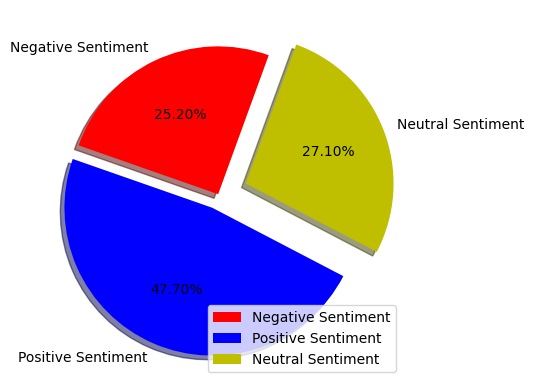

In [46]:
sentiments = ['Negative Sentiment','Positive Sentiment', 'Neutral Sentiment'] 
slices = [(data['sentiment'] == 'negative').sum(), (data['sentiment'] == 'positive').sum(), (data['sentiment'] == 'neutral').sum()]
colors = ['r','b','y'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=70, shadow = True,
        explode = (0, 0.1,0.2), radius = 1, autopct = '%1.2f%%') 
plt.legend(loc = "lower right")
plt.show() 

# Divide into number of classes for finding the probability

In [47]:
n_class = 3
n_tweet = 1000

if n_class == 2:
    df_pos = data.copy()[data.sentiment == 'positive'][:n_tweet]
    df_neg = data.copy()[data.sentiment == 'negative'][:n_tweet]
    df_neu = pd.DataFrame()
    df = pd.concat([df_pos, df_neg], ignore_index=True).reset_index(drop=True)
elif n_class == 3:
    df_pos = data.copy()[data.sentiment == 'positive'][:n_tweet]
    df_neg = data.copy()[data.sentiment == 'negative'][:n_tweet]
    df_neu = data.copy()[data.sentiment == 'neutral'][:n_tweet]
    df = pd.concat([df_pos, df_neg, df_neu], ignore_index=True).reset_index(drop=True)


# Dividing the training and testing data to find the accuracy of algorithm

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data['processed_tweet'], data['sentiment'], test_size=0.33, random_state=0)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train['processed_tweet'] = X_train
df_train['sentiment'] = y_train
df_train = df_train.reset_index(drop=True)

df_test['processed_tweet'] = X_test
df_test['sentiment'] = y_test
df_test = df_test.reset_index(drop=True)
df_test

,processed_tweet,sentiment
0,sedihnya saw some tiktok comment yang macam co...,negative
1,thread of wonyoung being sakura baby because t...,negative
2,follow u on tiktok for the latest on ny union ...,neutral
3,he part of the team now via caitlin_taylor tiktok,neutral
4,twitter and tiktok need the feature where you ...,neutral
...,...,...
325,so lotr fellowship of the ring turned yesterda...,negative
326,we updated our tiktok with this video,neutral
327,how much money do make on tiktok,neutral
328,thinking of the person on tiktok who said bts ...,positive


# Applying Naive Bayes Classifier for our processed tweet and sentiment label

In [49]:

class TweetNBClassifier(object):

    def __init__(self, df_train):
        self.df_train = df_train
        self.df_pos = df_train.copy()[df_train.sentiment == 'positive']
        self.df_neg = df_train.copy()[df_train.sentiment == 'negative']
        self.df_neu = df_train.copy()[df_train.sentiment == 'neutral']

    def fit(self):
        Pr_pos = df_pos.shape[0]/self.df_train.shape[0]
        Pr_neg = df_neg.shape[0]/self.df_train.shape[0]
        Pr_neu = df_neu.shape[0]/self.df_train.shape[0]
        self.Prior  = (Pr_pos, Pr_neg, Pr_neu)

        self.pos_words = ' '.join(self.df_pos['processed_tweet'].tolist()).split()
        self.neg_words = ' '.join(self.df_neg['processed_tweet'].tolist()).split()
        self.neu_words = ' '.join(self.df_neu['processed_tweet'].tolist()).split()

        all_words = ' '.join(self.df_train['processed_tweet'].tolist()).split()

        self.vocab = len(Counter(all_words))

        wc_pos = len(' '.join(self.df_pos['processed_tweet'].tolist()).split())
        wc_neg = len(' '.join(self.df_neg['processed_tweet'].tolist()).split())
        wc_neu = len(' '.join(self.df_neu['processed_tweet'].tolist()).split())
        self.word_count = (wc_pos, wc_neg, wc_neu)
        return self


    def predict(self, df_test):
        class_choice = ['positive', 'negative', 'neutral']

        classification = []
        for tweet in df_test['processed_tweet']:
            text = tweet.split()

            val_pos = np.array([])
            val_neg = np.array([])
            val_neu = np.array([])
            for word in text:
                tmp_pos = np.log((self.pos_words.count(word)+1)/(self.word_count[0]+self.vocab))
                tmp_neg = np.log((self.neg_words.count(word)+1)/(self.word_count[1]+self.vocab))
                tmp_neu = np.log((self.neu_words.count(word)+1)/(self.word_count[2]+self.vocab))
                val_pos = np.append(val_pos, tmp_pos)
                val_neg = np.append(val_neg, tmp_neg)
                val_neu = np.append(val_neu, tmp_neu)

            val_pos = np.log(self.Prior[0]) + np.sum(val_pos)
            val_neg = np.log(self.Prior[1]) + np.sum(val_neg)
            val_neu = np.log(self.Prior[2]) + np.sum(val_neu)

            probability = (val_pos, val_neg, val_neu)
            classification.append(class_choice[np.argmax(probability)])
        return classification


    def score(self, feature, target):

        compare = []
        for i in range(0,len(feature)):
            if feature[i] == target[i]:
                tmp ='correct'
                compare.append(tmp)
            else:
                tmp ='incorrect'
                compare.append(tmp)
        r = Counter(compare)
        accuracy = r['correct']/(r['correct']+r['incorrect'])
        return accuracy

# Calling functions to evaluate the model 

In [50]:
tnb = TweetNBClassifier(df_train)
tnb = tnb.fit()
predict = tnb.predict(df_test)
score = tnb.score(predict,df_test.sentiment.tolist())
print(score)

0.7181818181818181
